In [62]:
 import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [53]:
#to Visualize the dataset
def Visualizing_data():
    
    Data = pd.read_csv('dataset_1.txt', sep=',', header=None)  
    # data plot for the given sensors
    for i in range(1,len(Data[24].unique())+1):
        df_sitting = Data[Data[24]==i].values
         
        plt.title("Wrist Sensors")
        plt.plot(df_sitting[:,0:3]) # For wrist sensor
        plt.show()
        plt.title("Chest Sensors")
        plt.plot(df_sitting[:,6:9]) # For Chest Sensor
        plt.show()
        plt.title("Hips Sensors")
        plt.plot(df_sitting[:,12:15]) # For Hips Sensor
        plt.show()
        plt.title("Ankle Sensors")
        plt.plot(df_sitting[:,18:21]) # For Ankle Sensors
        plt.show()

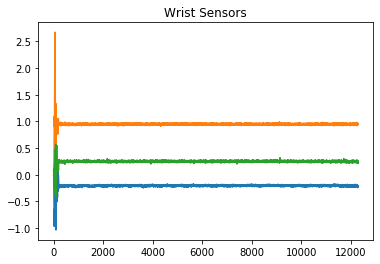

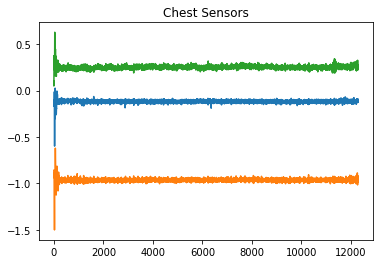

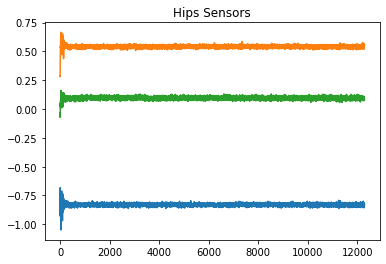

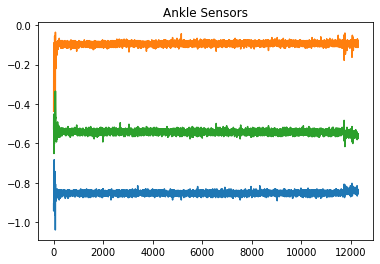

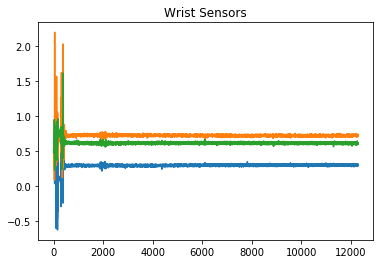

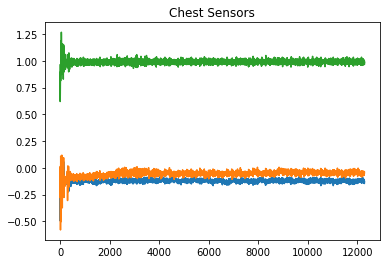

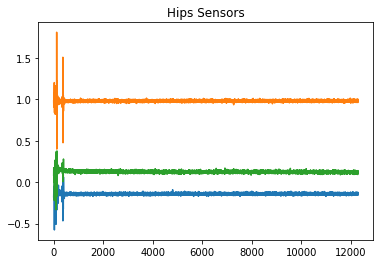

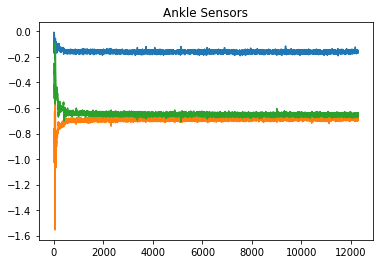

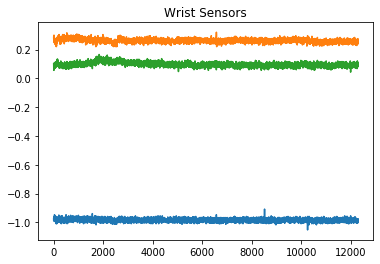

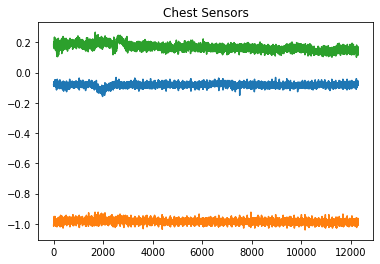

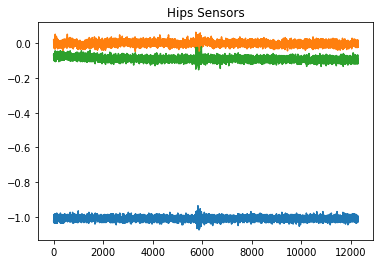

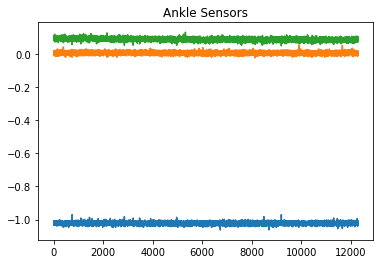

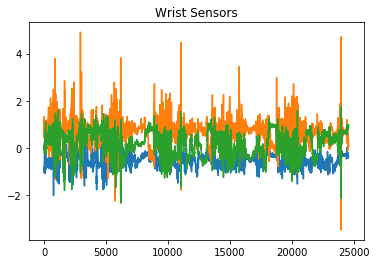

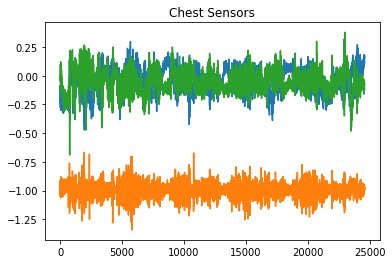

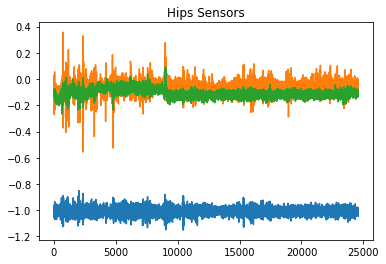

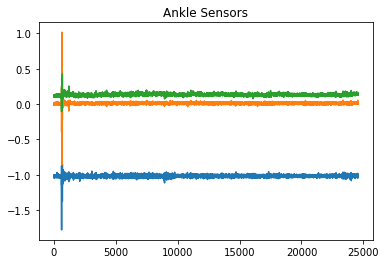

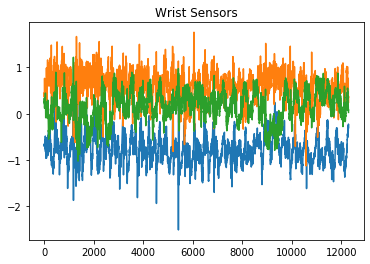

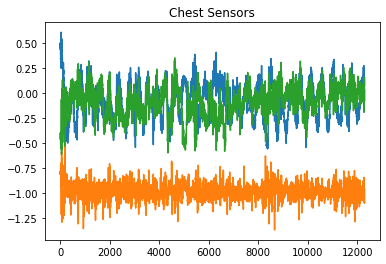

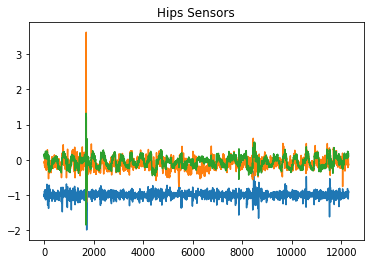

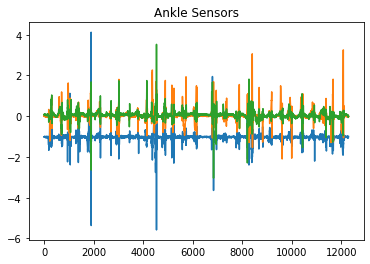

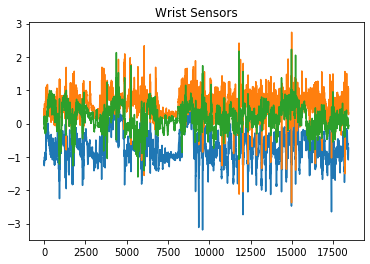

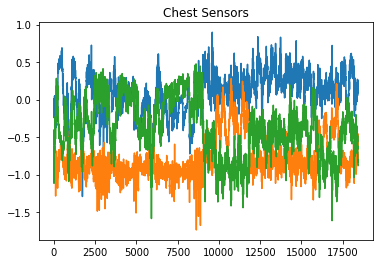

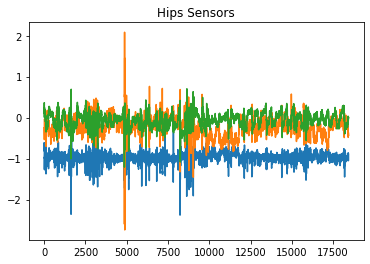

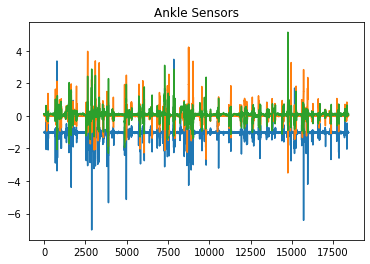

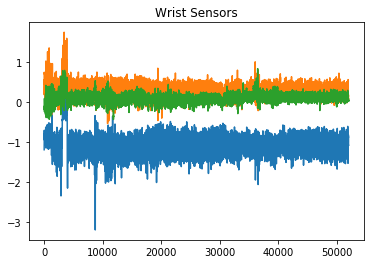

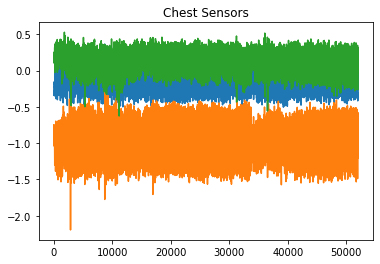

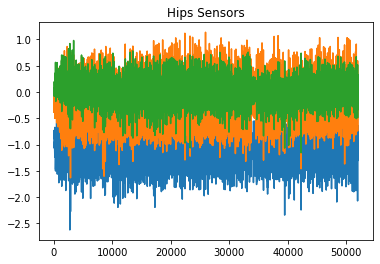

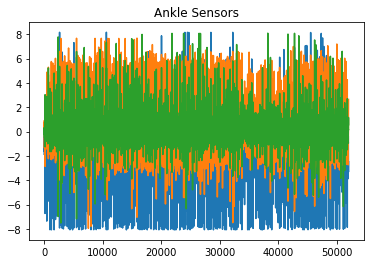

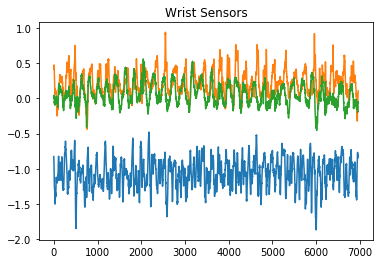

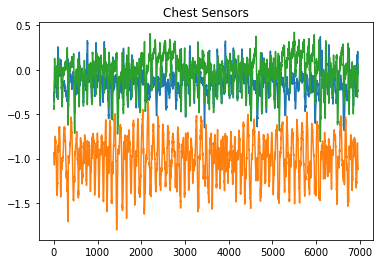

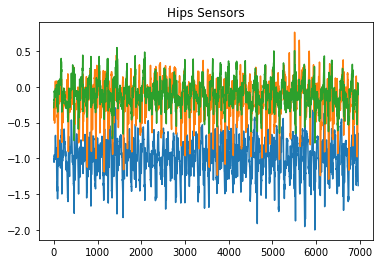

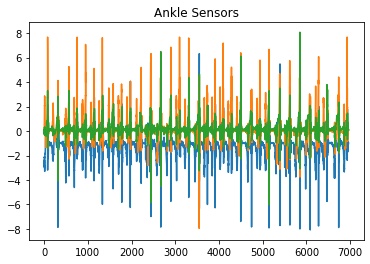

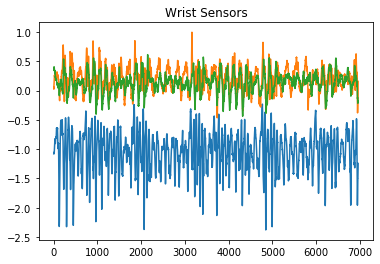

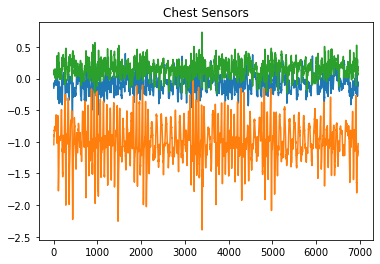

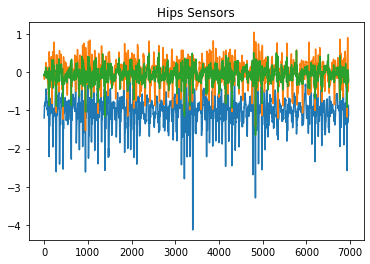

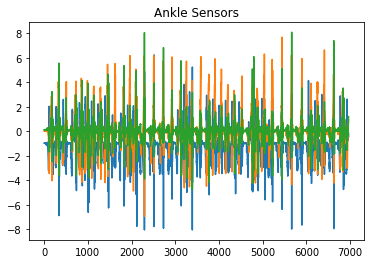

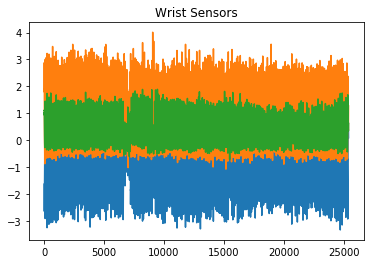

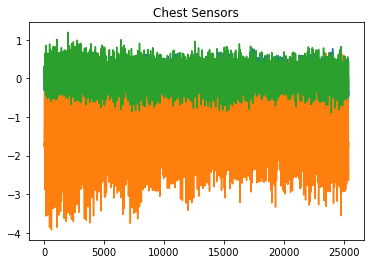

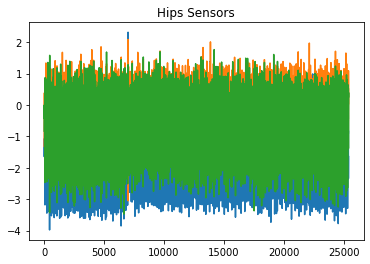

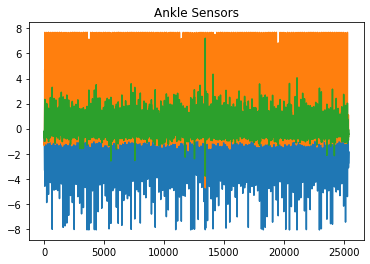

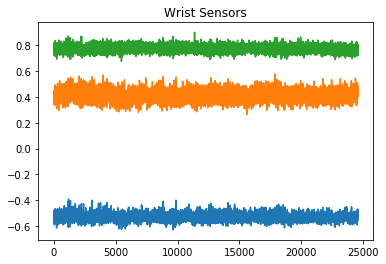

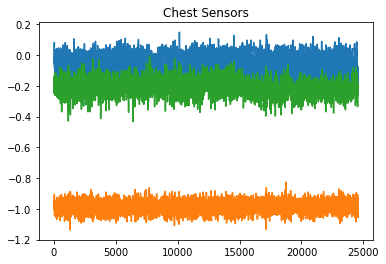

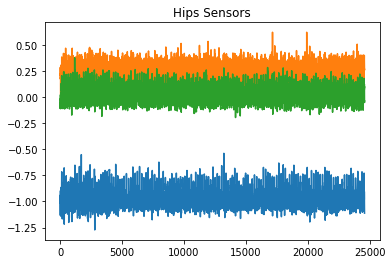

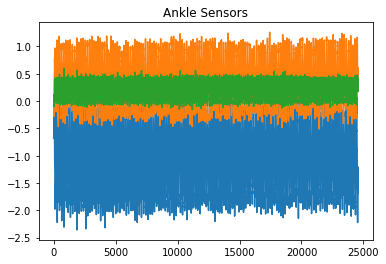

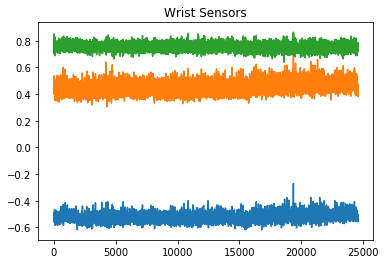

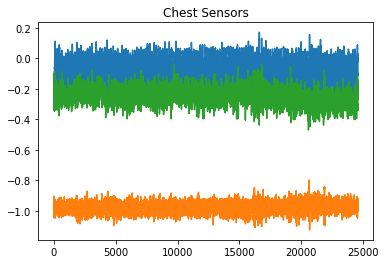

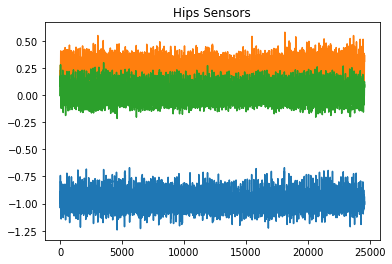

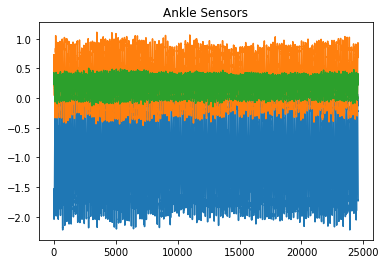

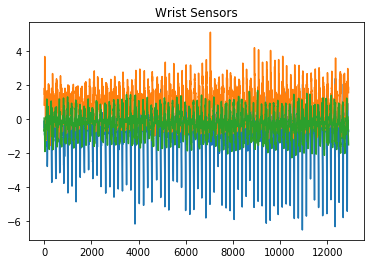

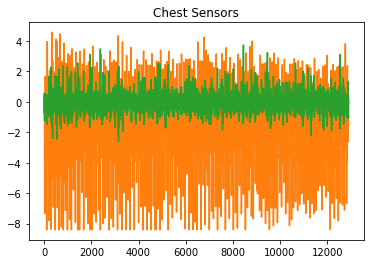

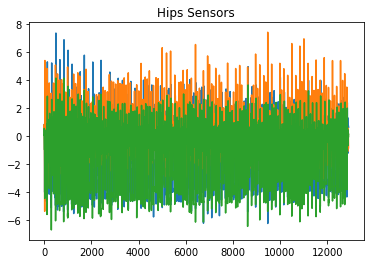

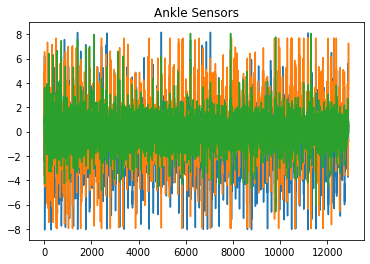

In [54]:
Visualizing_data()

In [63]:

#noise removal
def noise_removing():
    
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
     
    for a in range(1,14):
        df_sitting = df[df[24] == a].values
        for i in range(3):
            df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
        plt.plot(df_sitting[:, 0:3])
        plt.show()


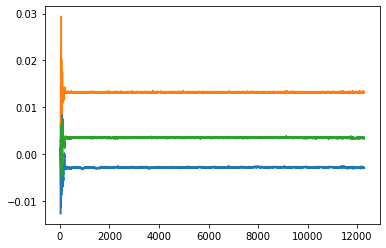

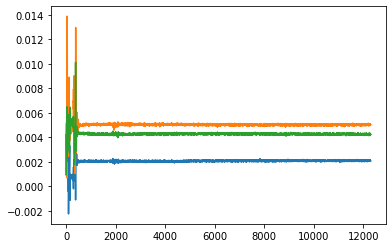

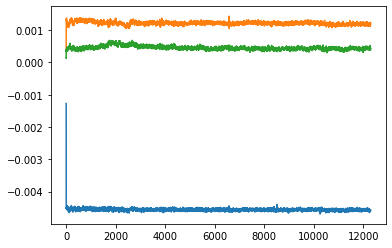

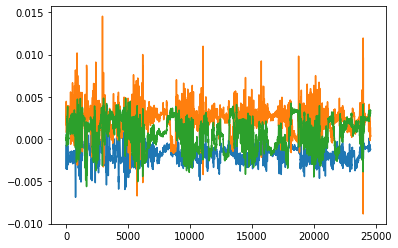

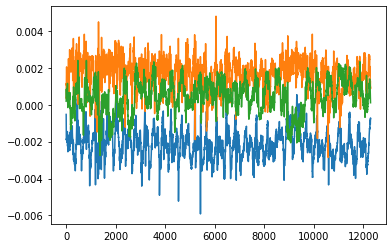

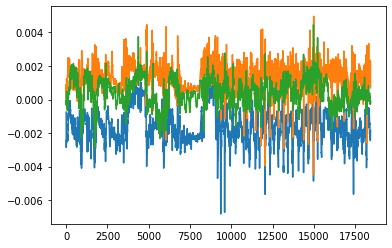

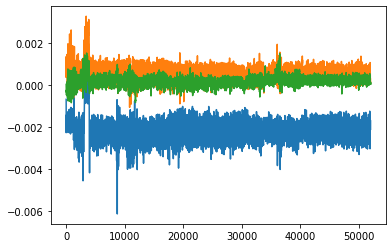

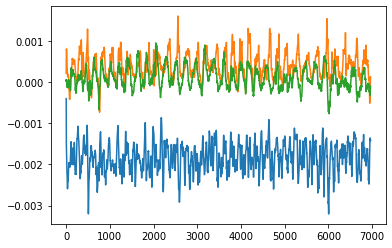

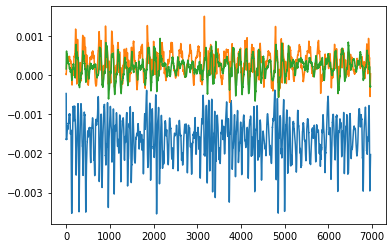

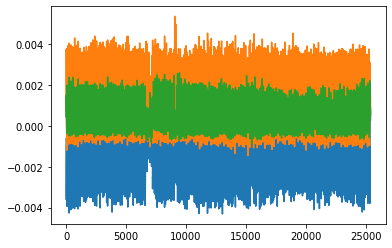

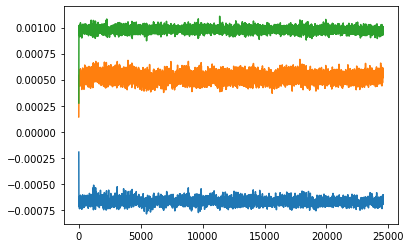

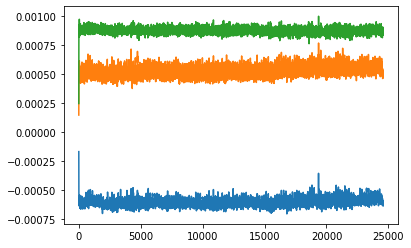

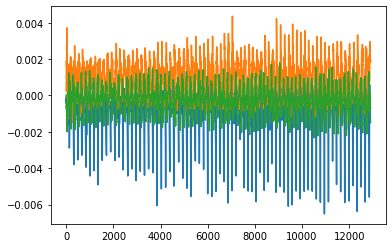

In [64]:
noise_removing()

In [65]:

def Feature_Extraction():
    # declaring arrays   
    training = np.empty(shape=(0, 37))
    testing = np.empty(shape=(0, 37))
    
     
    df = pd.read_csv("dataset_1.txt",sep = ',',header=None)
    
    activity_dataset = df[df[24]==2].values
    
    
    for i in range(1,19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        
        activity_dataset = np.append(activity_dataset,df[df[24]== 7].values, axis=0) # for walking
        
        b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
        # storing data
        for j in range(24):
            activity_dataset[:, j] = signal.lfilter(b, a, activity_dataset[:,j])
    
    # length of the data
    datat_len = len(activity_dataset)
    # Taking .8 = 80%
    training_len = math.floor(datat_len * 0.8)
    
    training_data = activity_dataset[:training_len, :]
    # compiling the remaining data
    testing_data = activity_dataset[training_len:, :]
    
    # Calculation training and testing number
    training_sample_number = training_len // 800 +1
    testing_sample_number = (datat_len - training_len) // 800 + 1

    for i in range(training_sample_number):
        if i < training_sample_number-1:
            sample_data = training_data[800*i:800*(i+1),:]
        else: sample_data= training_data[800*i:,:]
    
    
 
    feature_sample = []
    feature_sample = np.array([feature_sample])
    #  Wrist sensors calc 
    for i in range(3):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample = np.array([feature_sample])
                
    #  Chest sensors calc
    for i in range(6,9):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # Hips Sensors  
    for i in range(12,15):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # Ankle Sensors calc
    for i in range(18,21):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample= np.append(feature_sample,sample_data[0, -1])
    feature_sample = np.array([feature_sample])
    training = np.append(training, feature_sample,axis=0)
    
    # Calculating the value of sample data
    sample_data = []
    for s in range(testing_sample_number):
        if s < training_sample_number - 1:
            sample_data = testing_data[800*s:800*(s + 1), :]
        else:
            sample_data = testing_data[800*s:, :]

        
    """Testing data"""
        
    feature_sample = []
    feature_sample = np.array([feature_sample])
    # For Wrist 
    for i in range(3):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))
            
    # For Chest sensors
    for i in range(6,9):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))
    
    # For Hips Sensors 
    for i in range(12,15):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # For Ankle Sensors
    for i in range(18,21):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample= np.append(feature_sample,sample_data[0, -1])
    feature_sample = np.array([feature_sample])
    testing = np.append(training, feature_sample,axis=0)
    
    # Storing the values of training and testing dataset in a csv file
    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)

In [66]:
Feature_Extraction()

deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19


In [69]:
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[36].values
   
    y_train = y_train - 1
    df_training = df_training.drop([36], axis=1)
    X_train = df_training.values

    y_test = df_testing[36].values
    y_test = y_test - 1
    df_testing = df_testing.drop([36], axis=1)
    X_test = df_testing.values





In [70]:
# Build KNN classifier, in this example code
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')